<a href="https://colab.research.google.com/github/bardiaHSZD/TrendPrediction/blob/main/CNN_Signal_Processing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import dask.dataframe as dd

import gc

gc.enable()
plt.rcParams['figure.figsize'] = [15, 10]
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, Conv2D, MaxPooling1D, Flatten
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import scipy.io as sio
from os import listdir
from os.path import isfile, join
import numpy as np
import keras
from sklearn.metrics import accuracy_score
from keras import backend as K
import sys
import pickle
from keras.layers.pooling import GlobalAveragePooling1D

'''mypath = '/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/'#'training2017/' #Training directory
onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[0] == 'A')]
bats = [f for f in onlyfiles if f[7] == 'm']
with open('/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/bats.pkl', 'wb') as f:
    pickle.dump(bats, f)
print('Bats done!')
check = 100
mats = [f for f in bats if (np.shape(sio.loadmat(mypath + f)['val'])[1] >= check)]
with open('/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/mats.pkl', 'wb') as f:
    pickle.dump(mats, f)

print('Mats done!')
size = len(mats)
print('Total training size is ', size)
big = 10100
X = np.zeros((size, big))

print('size: ', size)
for i in range(size):
    dummy = sio.loadmat(mypath + mats[i])['val'][0, :]
    if (big - len(dummy)) <= 0:
        X[i, :] = dummy[0:big]
    else:
        b = dummy[0:(big - len(dummy))]
        goal = np.hstack((dummy, b))
        while len(goal) != big:
            b = dummy[0:(big - len(goal))]
            goal = np.hstack((goal, b))
        X[i, :] = goal


with open('/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/X.pkl', 'wb') as f:
    pickle.dump(X, f)

target_train = np.zeros((size, 1))
print(mypath + 'REFERENCE.csv')
Train_data = pd.read_csv(mypath + 'REFERENCE.csv', sep=',', header=None, names=None)

with open('/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/Train_data.pkl', 'wb') as f:
    pickle.dump(Train_data, f)'''

"mypath = '/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/'#'training2017/' #Training directory\nonlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[0] == 'A')]\nbats = [f for f in onlyfiles if f[7] == 'm']\nwith open('/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/bats.pkl', 'wb') as f:\n    pickle.dump(bats, f)\nprint('Bats done!')\ncheck = 100\nmats = [f for f in bats if (np.shape(sio.loadmat(mypath + f)['val'])[1] >= check)]\nwith open('/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/mats.pkl', 'wb') as f:\n    pickle.dump(mats, f)\n\nprint('Mats done!')\nsize = len(mats)\nprint('Total training size is ', size)\nbig = 10100\nX = np.zeros((size, big))\n\nprint('size: ', size)\nfor i in range(size):\n    dummy = sio.loadmat(mypath + mats[i])['val'][0, :]\n    if (big - len(dummy)) <= 0:\n        X[i, :] = dummy[0:big]\n    else:\n        b = dummy[0:(big - len(dummy))]\n        goal = np.hstack((dummy, b))\n        while len(goal) != bi

In [ ]:
bats = pickle.load( open( "/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/bats.pkl", "rb" ) )
mats = pickle.load( open( "/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/mats.pkl", "rb" ) )
X = pickle.load( open( "/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/X.pkl", "rb" ) )
Train_data = pickle.load( open( "/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/Train_data.pkl", "rb" ) )

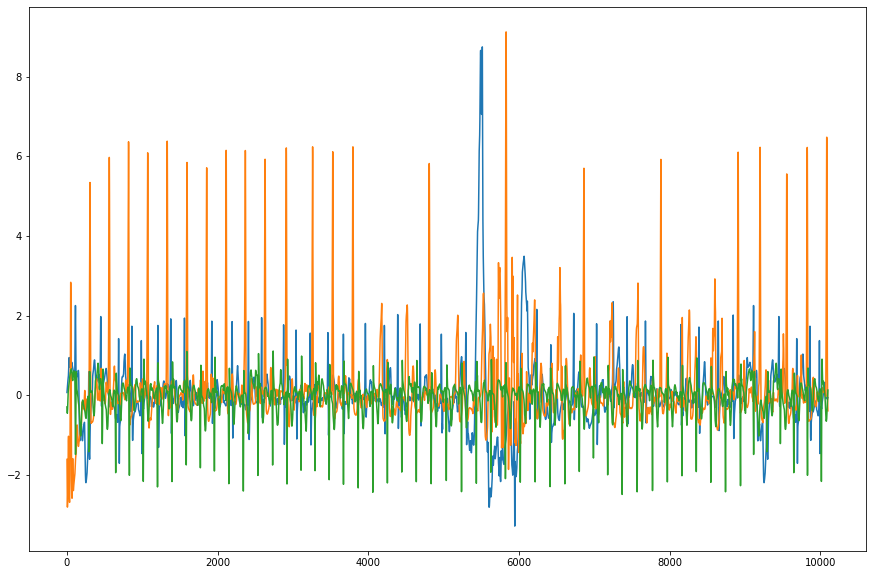

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[0])
plt.plot(X[1])
plt.plot(X[2])

## **Classification**

In [ ]:
np.random.seed(7)

number_of_classes = 4 #Total number of classes

def change(x):  #From boolean arrays to decimal arrays
    answer = np.zeros((np.shape(x)[0]))
    for i in range(np.shape(x)[0]):
        max_value = max(x[i, :])
        max_index = list(x[i, :]).index(max_value)
        answer[i] = max_index
    return answer.astype(np.int)
size = len(mats)
target_train = np.zeros((size, 1))


for i in range(size):
    if Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'N':
        target_train[i] = 0
    elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'A':
        target_train[i] = 1
    elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'O':
        target_train[i] = 2
    else:
        target_train[i] = 3

Label_set = np.zeros((size, number_of_classes))
for i in range(size):
    dummy = np.zeros((number_of_classes))
    dummy[int(target_train[i])] = 1
    Label_set[i, :] = dummy

X = (X - X.mean())/(X.std()) #Some normalization here
X = np.expand_dims(X, axis=2) #For Keras's data input size

values = [i for i in range(size)]
permutations = np.random.permutation(values)
X = X[permutations, :]
Label_set = Label_set[permutations, :]

train = 0.9 #Size of training set in percentage
X_train = X[:int(train * size), :]
Y_train = Label_set[:int(train * size), :]
X_val = X[int(train * size):, :]
Y_val = Label_set[int(train * size):, :]

# def train_and_evaluate__model(model, X_train, Y_train, X_val, Y_val, i):

# def create_model():
big = 10100

model = Sequential()
model.add(Conv1D(128, 55, activation='relu', input_shape=(big, 1)))
model.add(MaxPooling1D(10))
model.add(Dropout(0.5))
model.add(Conv1D(128, 25, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 10, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
# model.add(Flatten())
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab_Notebooks/XRF/Conv_models/Best_model.h5', monitor='val_acc', verbose=1, save_best_only=True)
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=275, epochs=500, verbose=2, shuffle=True, callbacks=[checkpointer])


Epoch 1/500
28/28 - 7s - loss: 1.1549 - accuracy: 0.5496 - val_loss: 1.0346 - val_accuracy: 0.5721
Epoch 2/500
28/28 - 5s - loss: 0.9894 - accuracy: 0.5927 - val_loss: 0.9502 - val_accuracy: 0.5721
Epoch 3/500
28/28 - 5s - loss: 0.9248 - accuracy: 0.5943 - val_loss: 0.8913 - val_accuracy: 0.5721
Epoch 4/500
28/28 - 5s - loss: 0.8500 - accuracy: 0.6085 - val_loss: 0.8731 - val_accuracy: 0.6331
Epoch 5/500
28/28 - 5s - loss: 0.7897 - accuracy: 0.6735 - val_loss: 0.7943 - val_accuracy: 0.6706
Epoch 6/500
28/28 - 5s - loss: 0.7382 - accuracy: 0.6975 - val_loss: 0.7727 - val_accuracy: 0.6917
Epoch 7/500
28/28 - 5s - loss: 0.7229 - accuracy: 0.6971 - val_loss: 0.7511 - val_accuracy: 0.6905
Epoch 8/500
28/28 - 5s - loss: 0.6692 - accuracy: 0.7199 - val_loss: 0.7099 - val_accuracy: 0.7186
Epoch 9/500
28/28 - 5s - loss: 0.6689 - accuracy: 0.7229 - val_loss: 0.6515 - val_accuracy: 0.7409
Epoch 10/500
28/28 - 5s - loss: 0.6134 - accuracy: 0.7414 - val_loss: 0.6242 - val_accuracy: 0.7515
Epoch 11/

FileNotFoundError: ignored

## **Validation**

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(hist.history).to_csv(path_or_buf='/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/History.csv')
predictions = model.predict(X_val)
score = accuracy_score(change(Y_val), change(predictions))
print('Last epoch\'s validation score is ', score)
df = pd.DataFrame(change(predictions))
df.to_csv(path_or_buf='/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/Preds_' + str(format(score, '.4f')) + '.csv', index=None, header=None)
pd.DataFrame(confusion_matrix(change(Y_val), change(predictions))).to_csv(path_or_buf='/content/drive/MyDrive/Colab_Notebooks/XRF/training2017/Result_Conf' + str(format(score, '.4f')) + '.csv', index=None, header=None)

Last epoch's validation score is  0.8276670574443142
